<a href="https://colab.research.google.com/github/ebmiller74/SLEAP_GSU/blob/main/Analysis_Feb_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup the environment
!pip install -qqq "sleap[pypi]>=1.3.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.1/904.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#Import packages
import sleap
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

mpl.style.use("seaborn-deep")
sleap.versions()

/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


SLEAP: 1.3.3
TensorFlow: 2.8.4
Numpy: 1.25.2
Python: 3.10.12
OS: Linux-6.1.58+-x86_64-with-glibc2.35


<ipython-input-2-1da4664626ec>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-deep")


In [3]:
# Load sleap metrics
help(sleap.load_metrics)

Help on function load_metrics in module sleap.nn.evals:

load_metrics(model_path: str, split: str = 'val') -> typing.Dict[str, typing.Any]
    Load metrics for a model.
    
    Args:
        model_path: Path to a model folder or metrics file (.npz).
        split: Name of the split to load the metrics for. Must be `"train"`, `"val"` or
            `"test"` (default: `"val"`). Ignored if a path to a metrics NPZ file is
            provided.
    
    Returns:
        The loaded metrics as a dictionary with keys:
    
        - `"vis.tp"`: Visibility - True Positives
        - `"vis.fp"`: Visibility - False Positives
        - `"vis.tn"`: Visibility - True Negatives
        - `"vis.fn"`: Visibility - False Negatives
        - `"vis.precision"`: Visibility - Precision
        - `"vis.recall"`: Visibility - Recall
        - `"dist.avg"`: Average Distance (ground truth vs prediction)
        - `"dist.p50"`: Distance for 50th percentile
        - `"dist.p75"`: Distance for 75th percentile
  

In [6]:
# Import data locally to environment

# Testing out to upload data from desktop
from google.colab import files
uploaded = files.upload()


Saving James test 1.011_DSC_0019.analysis.h5 to James test 1.011_DSC_0019.analysis.h5


In [7]:
# Look at data from James output

#Import file
filename = "James test 1.011_DSC_0019.analysis.h5"
# filename = "predictions.analysis.h5"

with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
James test 1.011_DSC_0019.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(10722, 7, 2, 3)

===nodes===
0: thorax
1: leg 1
2: leg 2
3: leg 3
4: leg 4
5: leg 5
6: leg 6



In [23]:
# Analysis: Thorax vs leg distance


dist_metrics = sleap.nn.evals.compute_dist_metrics("metrics.val.npz")
print("Dist metrics:", dist_metrics)


#plt.figure(figsize=(6, 3), dpi=150, facecolor="w")
#sns.histplot(metrics["dist.dists"].flatten(), binrange=(0, 20), kde=True, kde_kws={"clip": (0, 20)}, stat="probability")
#plt.xlabel("Localization error (px)");

TypeError: string indices must be integers

In [25]:
# Look at metrics of a trained model

metrics = sleap.nn.evals.load_metrics("metrics.val.npz")

# Print or analyze the loaded metrics
#print("Loaded metrics:", metrics)

# Example: Print the keys of the loaded metrics
print("Keys of loaded metrics:", metrics.keys())

# print("vis.precision",metrics)


Keys of loaded metrics: dict_keys(['vis.tp', 'vis.fp', 'vis.tn', 'vis.fn', 'vis.precision', 'vis.recall', 'dist.frame_idxs', 'dist.video_paths', 'dist.dists', 'dist.avg', 'dist.p50', 'dist.p75', 'dist.p90', 'dist.p95', 'dist.p99', 'pck.thresholds', 'pck.pcks', 'pck.mPCK_parts', 'pck.mPCK', 'oks.mOKS', 'oks_voc.match_score_thresholds', 'oks_voc.recall_thresholds', 'oks_voc.match_scores', 'oks_voc.precisions', 'oks_voc.recalls', 'oks_voc.AP', 'oks_voc.AR', 'oks_voc.mAP', 'oks_voc.mAR', 'pck_voc.match_score_thresholds', 'pck_voc.recall_thresholds', 'pck_voc.match_scores', 'pck_voc.precisions', 'pck_voc.recalls', 'pck_voc.AP', 'pck_voc.AR', 'pck_voc.mAP', 'pck_voc.mAR'])


In [32]:
# Assuming `predictions` and `labels` are your predicted and ground truth labels
#predictions = sleap.load_file("labels_gt.train.slp")
#labels = sleap.load_file("labels_gt.val.slp")

# Calculate precision
#precision = sleap.nn.evals.vis.precision(predictions, labels)

# Plot precision vs. threshold
#sleap.nn.evals.vis.plot_precision(precision)



print("Test: test", metrics[vis.tp])

NameError: name 'vis' is not defined

In [24]:
# Look at localization errors

print("Error distance (50%):", metrics["dist.p50"])
print("Error distance (90%):", metrics["dist.p90"])
print("Error distance (95%):", metrics["dist.p95"])

# The lower the percentage, the better the model training was!

Error distance (50%): 2.3111428068575632e-05
Error distance (90%): 4.67097068035583e-05
Error distance (95%): 5.164145117670911e-05


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79410da2cf70> (for post_execute):


KeyboardInterrupt: 

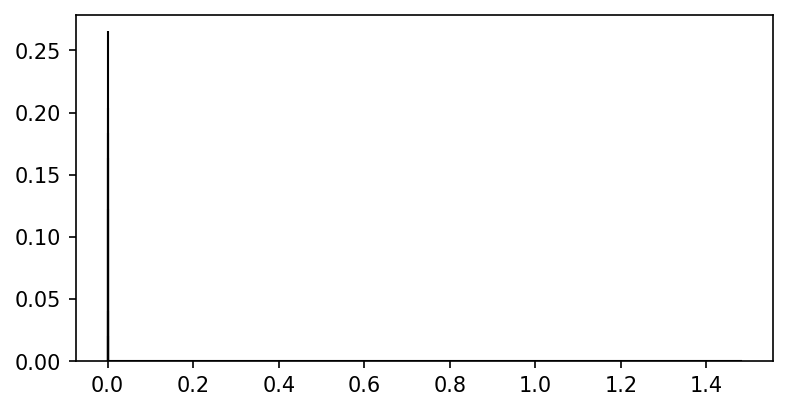

In [25]:
# This does not work
# Visualize the entire distribution

plt.figure(figsize=(6, 3), dpi=150, facecolor="w")
sns.histplot(metrics["dist.dists"].flatten(), binrange=(0, 20), kde=True, kde_kws={"clip": (0, 20)}, stat="probability")
plt.xlabel("Localization error (px)");

In [30]:
# VOC with OKS scores - mean Average Precision (mAP)

print("VOC with OKS scores - mean Average Precision (mAP):", metrics["oks_voc.mAP"])
print("Mean Percentage of Correct Keypoints (PCK):", metrics["pck.mPCK"])
print("Precision:", metrics["vis.precision"])
print("Recall:", metrics["vis.recall"])

VOC with OKS scores - mean Average Precision (mAP): 0.12871287128712872
Mean Percentage of Correct Keypoints (PCK): 1.0
Precision: 1.0
Recall: 1.0
